In [51]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [128]:
# Generate data
X, y= make_blobs(centers= 4, n_samples= 500, n_features= 2, shuffle= True, random_state= 42)
print(X.shape)

(500, 2)


**K Means ++ algorithm for better initialization**<br>
1. Select the first centroid at random.<br>
2. a. Now calculate the distant between all the points which are not centroid and the closet centroid point.<br>
    b. Normalize the calculated distance and use the normalized distance as probability distribution for selecting the next centroid.<br>
    The point with the largest distance has higher probability to get selected as the next centroid.<br>
3. Repeat step 2 until all the centroids are calculated.

In [118]:
# X = np.random.randn(10, 2)

In [129]:
n_sample, n_feat = X.shape
k = 4
centroids = np.zeros((k, n_feat))

In [136]:
# Find the distance between centroids and data points
np.random.seed(42)

idx1 = np.random.choice(range(n_sample), size=1, replace=False)
centroids[0] = X[idx1]
distances = []

for i in range(1, k):
    # Calculate the distance between last centroid and all the remaining points.
    distance =  ((X - centroids[i-1]) *
                (X - centroids[i-1])).sum(axis=1)
    distances.append(distance)
    # Find the minimum distance among all the centroids.
    distance2 = np.min(distances, axis=0)
    # Normalise the calculated distances to form probability distribution.
    prob = distance2 / distance2.sum()
    # Find the next centroid based on the calculated prob distribution.
    centroid_next = np.random.choice(range(n_sample), size=1, p=prob)
    # centroid_next = prob.argmax()
    print(X[centroid_next])
    centroids[i] = X[centroid_next]

[[-8.90849347  5.66256198]]
[[-5.21415275 -5.86573953]]
[[3.74146416 2.46508886]]


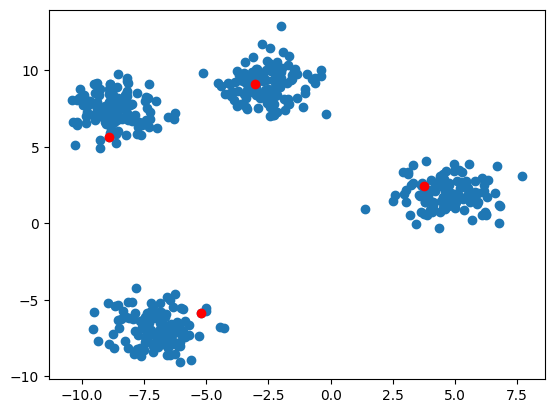

In [137]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r')
# plt.scatter(centroids2[:, 0], centroids2[:, 1], c='k')

In [167]:
def assign_centroid(X, centroids):
    # Calculate the distance between each points from the centroids
    distances = np.zeros((len(centroids), X.shape[0]))
    for i, centroid in enumerate(centroids):
        distance = np.sum((X - centroid) * (X - centroid), axis=1)
        distances[i] = distance
    out = np.argmin(distances, axis=0)
    return out

def assign_centroid_parallel(X, centroids: np.array) -> np.array:
    """
        X: training data set.
        centroids: numpy array containing the current centroids. shape: [k, X.shape[1]]
    """
    # Reshape the centroid array to parallelize jthe distance calculation.
    centroids3d = centroids.reshape(centroids.shape[0], 1, centroids.shape[1])    # shape: [k,1, X.shape[1]]
    distance = ((X - centroids3d) * (X - centroids3d)).sum(axis=-1)     # shape: [k, X.shape[1]]
    out = distance.argmin(axis=0)   # shape: [x.shape[1]]
    return out

In [180]:
# Parallelizing the distance calculation
arr = np.random.randn(10, 2)
print(arr)
centroids = np.array([arr[0],
                      arr[2]])
print(centroids)

[[ 1.63885999e+00  2.25235353e-01]
 [ 1.66429536e-01  8.07555632e-01]
 [ 9.24152383e-01  8.12856464e-01]
 [-1.35072195e+00 -6.37235532e-01]
 [-6.56528951e-01 -7.79080229e-01]
 [-8.72103765e-01 -6.71023911e-01]
 [ 3.35948743e-01  4.94409287e-01]
 [-1.63596664e-03 -4.26032339e-01]
 [ 1.27546325e+00 -9.15660606e-02]
 [ 9.37072520e-01 -5.69326131e-01]]
[[1.63885999 0.22523535]
 [0.92415238 0.81285646]]


In [181]:
centroid_assigned = assign_centroid(arr, centroids)
centroid_assigned_parallel = assign_centroid_parallel(arr, centroids)

In [169]:
(centroid_assigned == centroid_assigned_parallel).all()

True

In [185]:
def update_centroids(X, current_centroids, assigned_centroids):
    new_centroids = []
    for i in range(len(current_centroids)):
        idx_i = assigned_centroids[assigned_centroids == i]
        new_centroid = X[idx_i].mean(axis=0)
        new_centroids.append(new_centroid)
    return new_centroids

In [173]:
arr1 = np.array([1, 2, 1, 2, 2, 3, 0, 4, 3, 5])
arr[arr1 == 1]

array([[-0.3233728 , -1.66011742],
       [-0.6462995 , -0.40355496]])

In [186]:
centroids_updated = update_centroids(arr, centroids, centroid_assigned_parallel)

In [187]:
centroids_updated

[array([1.63885999, 0.22523535]), array([0.16642954, 0.80755563])]

In [189]:
centroids

array([[1.63885999, 0.22523535],
       [0.92415238, 0.81285646]])